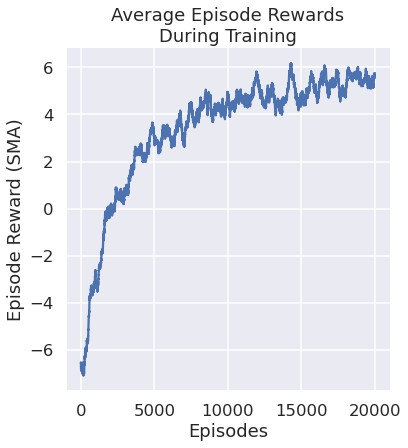

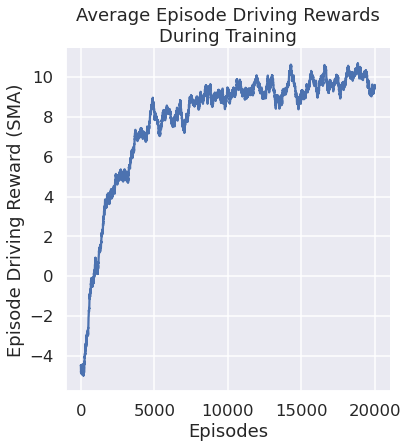

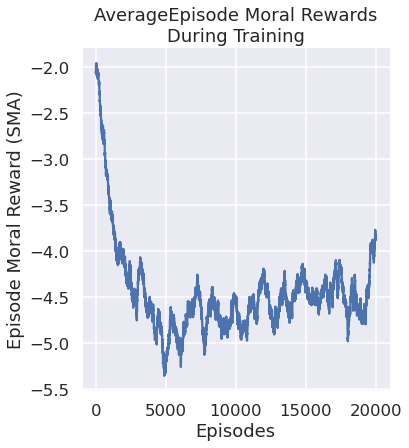

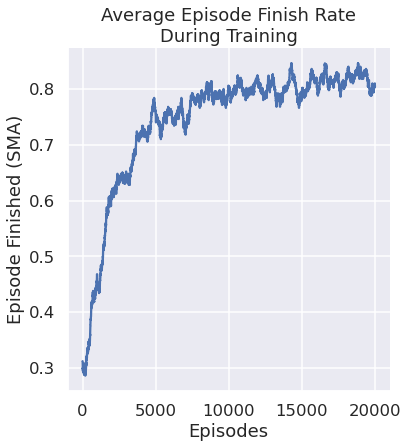

In [96]:
from pathlib import Path

import numpy as np
import seaborn as sns
from scipy.ndimage.filters import uniform_filter1d

plot_dir = Path('plots')
plot_dir.mkdir(parents=True, exist_ok=True)

logs_path = 'models/dqn/dqn_moral_1/dqn_moral_1_20000/logs.npz'
logs = np.load(logs_path)

rewards = logs['rewards']
driving_rewards = logs['driving_rewards']
moral_rewards = logs['moral_rewards']
finished = logs['finished'].astype(float)

average = 500
rewards_smooth = uniform_filter1d(rewards, average, mode='reflect')
driving_rewards_smooth = uniform_filter1d(driving_rewards, average, mode='reflect')
moral_rewards_smooth = uniform_filter1d(moral_rewards, 500, mode='reflect')
finished_smooth = uniform_filter1d(finished, average, mode='reflect')

sns.set_theme(context='talk', style='darkgrid', palette='deep')

g = sns.relplot(x=np.arange(len(rewards_smooth)), y=rewards_smooth, kind="line", height=6)
g.ax.set_title('Average Episode Rewards\nDuring Training')
g.ax.set_xlabel('Episodes')
g.ax.set_ylabel('Episode Reward (SMA)')
g.savefig(plot_dir / 'episode_rewards.png', dpi=150)

g = sns.relplot(x=np.arange(len(driving_rewards_smooth)), y=driving_rewards_smooth, kind="line", height=6)
g.ax.set_title('Average Episode Driving Rewards\nDuring Training')
g.ax.set_xlabel('Episodes')
g.ax.set_ylabel('Episode Driving Reward (SMA)')
g.savefig(plot_dir / 'episode_driving_rewards.png', dpi=150)

g = sns.relplot(x=np.arange(len(moral_rewards_smooth)), y=moral_rewards_smooth, kind="line", height=6)
g.ax.set_title('AverageEpisode Moral Rewards\nDuring Training')
g.ax.set_xlabel('Episodes')
g.ax.set_ylabel('Episode Moral Reward (SMA)')
g.savefig(plot_dir / 'episode_moral_rewards.png', dpi=150)

g = sns.relplot(x=np.arange(len(finished_smooth)), y=finished_smooth, kind="line", height=6)
g.ax.set_title('Average Episode Finish Rate\nDuring Training')
g.ax.set_xlabel('Episodes')
g.ax.set_ylabel('Episode Finished (SMA)')
g.savefig(plot_dir / 'episode_finish_rate.png', dpi=150)

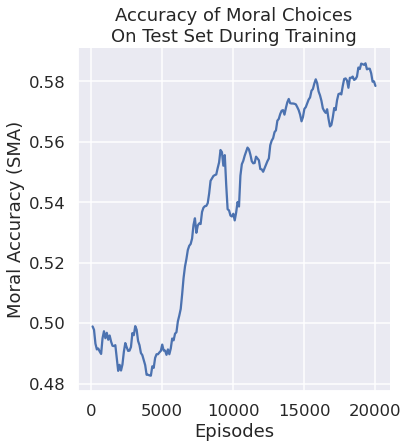

In [99]:
from pathlib import Path

import numpy as np
import seaborn as sns
from scipy.ndimage.filters import uniform_filter1d

plot_dir = Path('plots')
plot_dir.mkdir(parents=True, exist_ok=True)

accuracy_path = 'models/dqn/dqn_moral_1/dqn_moral_1_20000/accuracy.npy'
accuracy = np.load(accuracy_path)

average = 10
accuracy_smooth = uniform_filter1d(accuracy[:,1], average, mode='nearest')

sns.set_theme(context='talk', style='darkgrid', palette='deep')

g = sns.relplot(x=accuracy[:,0], y=accuracy_smooth, kind="line", height=6)
g.ax.set_title('Accuracy of Moral Choices\nOn Test Set During Training')
g.ax.set_xlabel('Episodes')
g.ax.set_ylabel('Moral Accuracy (SMA)')
g.savefig(plot_dir / 'moral_accuracy.png', dpi=150)

<Figure size 720x720 with 0 Axes>

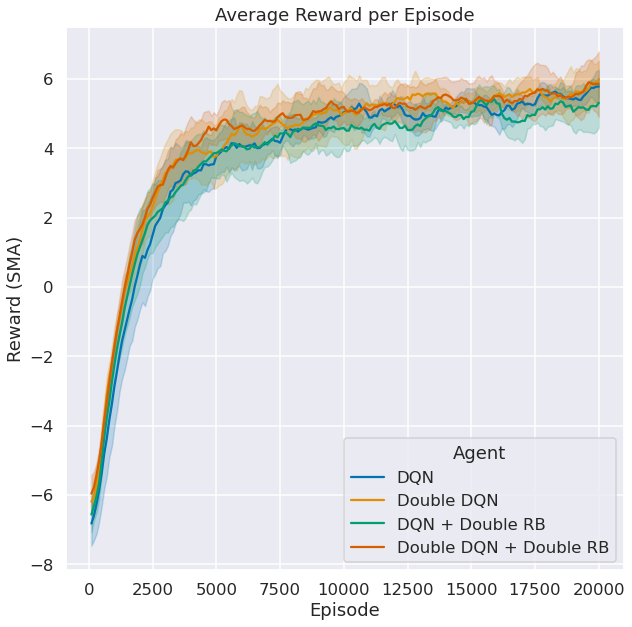

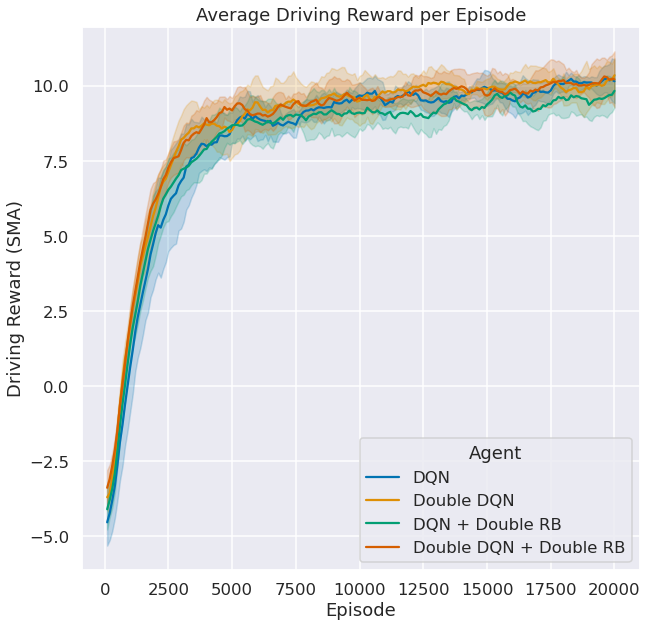

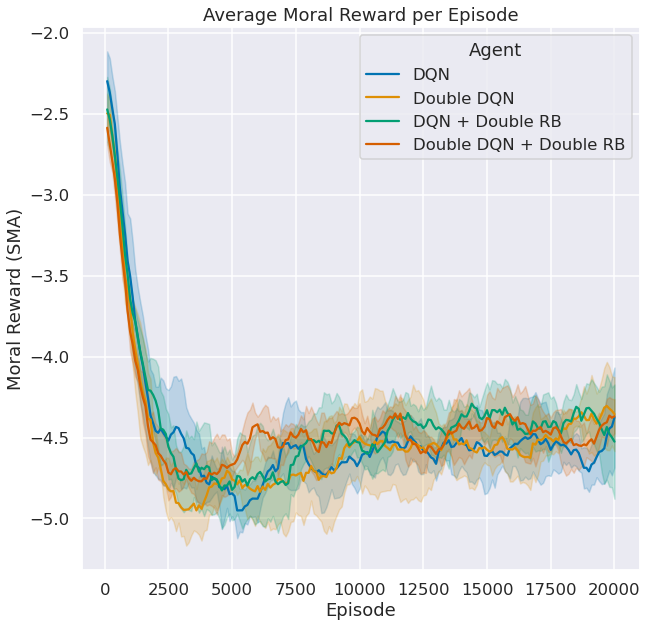

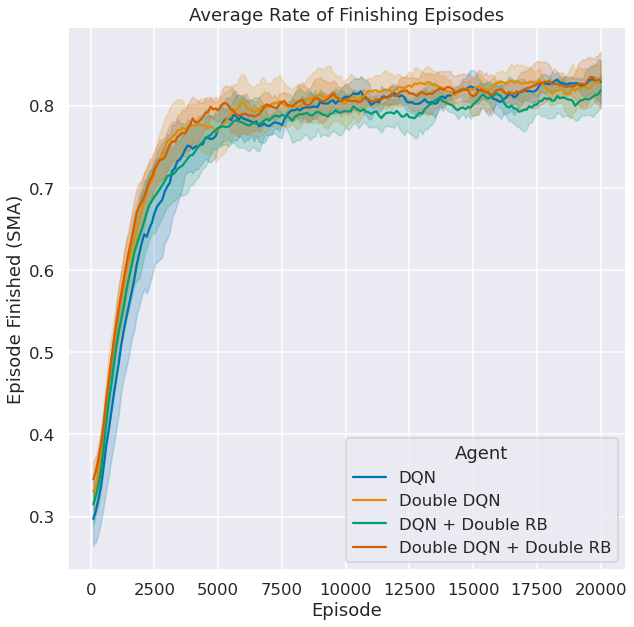

<Figure size 720x720 with 0 Axes>

In [112]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
from scipy.ndimage.filters import uniform_filter1d

plot_dir = Path('plots')
plot_dir.mkdir(parents=True, exist_ok=True)

num_runs = 5
final_episode = 20000
logs_paths = {
    'DQN': 'models/dqn/dqn_moral',
    'Double DQN': 'models/double_dqn/double_dqn_moral',
    'DQN + Double RB': 'models/double_replay/double_replay_moral',
    'Double DQN + Double RB': 'models/double_dqn_double_replay/double_dqn_moral',
}

dfs = []
for name, path in logs_paths.items():
    path = Path(path)
    for run in range(1, num_runs + 1):
        model_name = f'{path.name}_{run}'
        final_model_name = f'{model_name}_{final_episode}'
        logs_path = path.parent / model_name / final_model_name / 'logs.npz'

        logs = np.load(logs_path)
        rewards = logs['rewards']
        driving_rewards = logs['driving_rewards']
        moral_rewards = logs['moral_rewards']
        finished = logs['finished'].astype(float)

        average = 1000
        rewards_average = uniform_filter1d(rewards, average, mode='reflect')
        driving_rewards_average = uniform_filter1d(driving_rewards, average, mode='reflect')
        moral_rewards_average = uniform_filter1d(moral_rewards, average, mode='reflect')
        finished_average = uniform_filter1d(finished, average, mode='reflect')

        display = 100
        df = pd.DataFrame(data={
            'Agent': name,
            'Run': run,
            'Episode': np.arange(1, len(rewards) + 1)[display - 1::display],
            'Reward (SMA)': rewards_average[display - 1::display],
            'Driving Reward (SMA)': driving_rewards_average[display - 1::display],
            'Moral Reward (SMA)': moral_rewards_average[display - 1::display],
            'Episode Finished (SMA)': finished_average[display - 1::display],
        })
        dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

rcParams['figure.figsize'] = 10, 10
sns.set_theme(context='talk', style='darkgrid', palette='colorblind')

ax = sns.lineplot(data=df, x='Episode', y='Reward (SMA)', hue='Agent', ci='sd')
ax.set_title('Average Reward per Episode')
plt.savefig(plot_dir / 'episode_rewards_all.png', dpi=150)
plt.figure()

ax = sns.lineplot(data=df, x='Episode', y='Driving Reward (SMA)', hue='Agent', ci='sd')
ax.set_title('Average Driving Reward per Episode')
plt.savefig(plot_dir / 'episode_driving_rewards_all.png', dpi=150)
plt.figure()

ax = sns.lineplot(data=df, x='Episode', y='Moral Reward (SMA)', hue='Agent', ci='sd')
ax.set_title('Average Moral Reward per Episode')
plt.savefig(plot_dir / 'episode_moral_rewards_all.png', dpi=150)
plt.figure()

ax = sns.lineplot(data=df, x='Episode', y='Episode Finished (SMA)', hue='Agent', ci='sd')
ax.set_title('Average Rate of Finishing Episodes')
plt.savefig(plot_dir / 'episode_finish_rate_all.png', dpi=150)
plt.figure()

<Figure size 720x720 with 0 Axes>

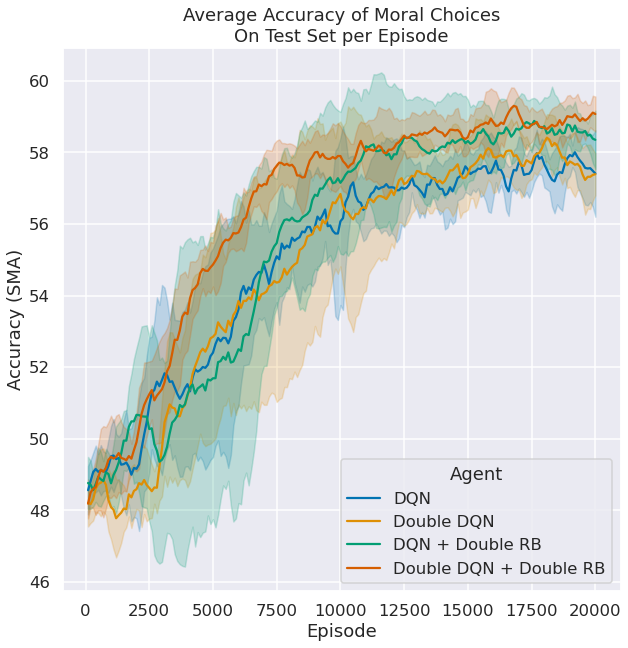

<Figure size 720x720 with 0 Axes>

In [114]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
from scipy.ndimage.filters import uniform_filter1d

plot_dir = Path('plots')
plot_dir.mkdir(parents=True, exist_ok=True)

num_runs = 5
final_episode = 20000
logs_paths = {
    'DQN': 'models/dqn/dqn_moral',
    'Double DQN': 'models/double_dqn/double_dqn_moral',
    'DQN + Double RB': 'models/double_replay/double_replay_moral',
    'Double DQN + Double RB': 'models/double_dqn_double_replay/double_dqn_moral',
}

dfs = []
for name, path in logs_paths.items():
    path = Path(path)
    for run in range(1, num_runs + 1):
        model_name = f'{path.name}_{run}'
        final_model_name = f'{model_name}_{final_episode}'
        accuracy_path = path.parent / model_name / final_model_name / 'accuracy.npy'

        accuracy = np.load(accuracy_path)
        episode = accuracy[:,0]
        accuracy = accuracy[:,1] * 100

        average = 5
        accuracy_average = uniform_filter1d(accuracy, average, mode='reflect')

        display = 1
        df = pd.DataFrame(data={
            'Agent': name,
            'Run': run,
            'Episode': episode[display - 1::display],
            'Accuracy (SMA)': accuracy_average[display - 1::display],
        })
        dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

rcParams['figure.figsize'] = 10, 10
sns.set_theme(context='talk', style='darkgrid', palette='colorblind')

ax = sns.lineplot(data=df, x='Episode', y='Accuracy (SMA)', hue='Agent', ci='sd')
ax.set_title('Average Accuracy of Moral Choices\nOn Test Set per Episode')
plt.savefig(plot_dir / 'moral_accuracy_all.png', dpi=150)
plt.figure()